In [5]:
from sklearn.model_selection import train_test_split
import yfinance as yf
import pandas_datareader as pdr
import pandas as pd
import numpy as np

snp = yf.Ticker("^GSPC").history("5y", actions=False)
snp["Daily"] = (1-(snp["Open"] / snp["Close"]))*100
snp["Volatility"] = (1-(snp["Low"]/snp["High"]))
snp = snp.drop(["High", "Low", "Open", "Close"], axis="columns")
df = snp["Daily"]

snp["Lag1"] = df.shift(1, fill_value=0)
snp["Lag2"] = df.shift(2, fill_value=0)
snp["Lag3"] = df.shift(3, fill_value=0)
snp["Lag4"] = df.shift(4, fill_value=0)
snp["Lag5"] = df.shift(5, fill_value=0)
snp

,Volume,Daily,Volatility,Lag1,Lag2,Lag3,Lag4,Lag5
Date,,,,,,,,
2020-04-02 00:00:00-04:00,6464190000,2.705286,0.030566,0.000000,0.000000,0.000000,0.000000,0.000000
2020-04-03 00:00:00-04:00,6096970000,-1.055593,0.030817,2.705286,0.000000,0.000000,0.000000,0.000000
2020-04-06 00:00:00-04:00,6403840000,3.206087,0.038209,-1.055593,2.705286,0.000000,0.000000,0.000000
2020-04-07 00:00:00-04:00,7050410000,-2.979608,0.035990,3.206087,-1.055593,2.705286,0.000000,0.000000
2020-04-08 00:00:00-04:00,5875710000,2.362926,0.035298,-2.979608,3.206087,-1.055593,2.705286,0.000000
...,...,...,...,...,...,...,...,...
2025-03-26 00:00:00-04:00,4183140000,-1.040929,0.015425,0.011944,0.858069,0.649840,0.282015,0.756260
2025-03-27 00:00:00-04:00,4403460000,-0.040927,0.010701,-1.040929,0.011944,0.858069,0.649840,0.282015
2025-03-28 00:00:00-04:00,4513330000,-1.760640,0.019956,-0.040927,-1.040929,0.011944,0.858069,0.649840


In [10]:
from datetime import datetime
import pytz

split = datetime(2022, 1, 1,  0, 0, tzinfo=pytz.timezone("America/New_York"))
train = snp[snp.index <= split]
test = snp[snp.index > split]

X_train, y_train = train.drop(["Daily"], axis="columns"), np.sign(train["Daily"])

X_test, y_test = test.drop(["Daily"], axis="columns"), np.sign(test["Daily"])

X_train = X_train[5:]
y_train = y_train[5:]

Date
2020-04-09 00:00:00-04:00    1.0
2020-04-13 00:00:00-04:00   -1.0
2020-04-14 00:00:00-04:00    1.0
2020-04-15 00:00:00-04:00   -1.0
2020-04-16 00:00:00-04:00    1.0
                            ... 
2021-12-27 00:00:00-05:00    1.0
2021-12-28 00:00:00-05:00   -1.0
2021-12-29 00:00:00-05:00    1.0
2021-12-30 00:00:00-05:00   -1.0
2021-12-31 00:00:00-05:00   -1.0
Name: Daily, Length: 437, dtype: float64

              precision    recall  f1-score   support

        -1.0       0.54      0.08      0.14       386
         1.0       0.53      0.94      0.68       428

    accuracy                           0.53       814
   macro avg       0.54      0.51      0.41       814
weighted avg       0.54      0.53      0.42       814



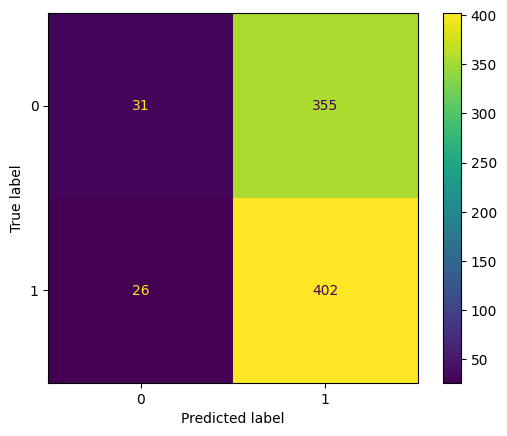

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

        -1.0       0.55      0.48      0.51       386
         1.0       0.58      0.64      0.61       428

    accuracy                           0.57       814
   macro avg       0.56      0.56      0.56       814
weighted avg       0.56      0.57      0.56       814



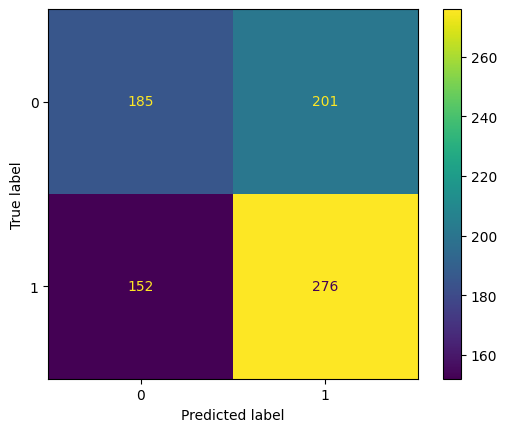

In [12]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler
model = ComplementNB()
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

        -1.0       0.45      0.15      0.22       386
         1.0       0.52      0.84      0.64       428

    accuracy                           0.51       814
   macro avg       0.49      0.49      0.43       814
weighted avg       0.49      0.51      0.44       814



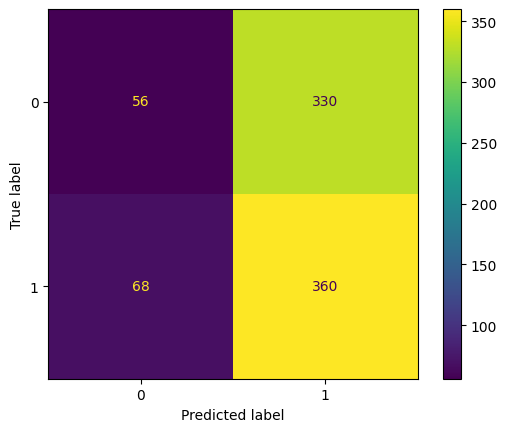

In [13]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()